# Shapely for geometric objects

In this lesson, you will learn how to create and manipulate geometries in Python using the [Shapely Python Package](https://shapely.readthedocs.io/en/stable/manual.html).


**Credit:**

[Vuokko Heikinheimo, Henrikki Tenkanen](https://automating-gis-processes.github.io/)  
Department of Geosciences & Geography, University of Helsinki  


These materials are partly based on [Shapely-documentation](https://shapely.readthedocs.io/en/stable/manual.html) and [Westra
E. (2013), Chapter 3](https://www.packtpub.com/application-development/python-geospatial-development-second-edition).

## Spatial data model

![Spatial data model](img/SpatialDataModel.PNG)

*Fundamental geometric objects that can be used in Python with* [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

The most fundamental geometric objects are `Points`, `Lines` and `Polygons` which are the basic ingredients when working with spatial data in vector format. 
Python has a specific module called [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) for doing various geometric operations. Basic knowledge of using Shapely is fundamental for understanding how geometries are stored and handled in GeoPandas.

**Geometric objects consist of coordinate tuples where:**

-  `Point` -object represents a single point in space. Points can be either two-dimensional (x, y) or three dimensional (x, y, z).
-  `LineString` -object (i.e. a line) represents a sequence of points joined together to form a line. Hence, a line consist of a list of at least two coordinate tuples
-  `Polygon` -object represents a filled area that consists of a list of at least three coordinate tuples that forms the outerior ring and a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g. Polygons with multiple parts):**

-  `MultiPoint` -object represents a collection of points and consists of a list of coordinate-tuples
-  `MultiLineString` -object represents a collection of lines and consists of a list of line-like sequences
-  `MultiPolygon` -object represents a collection of polygons that consists of a list of polygon-like sequences that construct from exterior ring and (possible) hole list tuples

**Useful attributes and methods in Shapely include:**

-  Creating lines and polygons based on a collection of point objects.
-  Calculating areas/length/bounds etc. of input geometries
-  Conducting geometric operations based on the input geometries such as `union`, `difference`, `distance` etc.
-  Conducting spatial queries between geometries such as `intersects`, `touches`, `crosses`, `within` etc.


## Point

Creating point is easy, you pass x and y coordinates into `Point()` -object (+ possibly also z -coordinate):

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates

point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

Let's see what these variables now contain: 

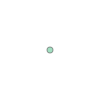

In [2]:
# Visualize
point1

As we see here, Jupyter notebook is able to display the shape directly on the screen.

We can use the print statement to get information about the actual definition of these objects:

In [3]:
# Print 
print(point1)

POINT (2.2 4.2)


3D-point can be recognized from the capital Z -letter in front of the coordinates.

Let's also check the data type of a point:

In [4]:
# Check point type
type(point1)

shapely.geometry.point.Point

We can see that the type of the point is shapely's Point. The point object is represented in a specific format based on
[GEOS](https://trac.osgeo.org/geos) C++ library that is one of the standard libraries behind various Geographic Information Systems. It runs under the hood e.g. in [QGIS](http://www.qgis.org/en/site/). 

We can also access the geometry type of the object using `geom_type` attribute:

In [5]:
# Find geom_type
point3D.geom_type

'Point'

### Point attributes and functions

Points and other shapely objects have useful built-in [attributes and methods](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Using the available attributes, we can for example extract the coordinate values of a Point and calculate the Euclidian distance between points.

Extracting the coordinates of a Point can be done in a couple of different ways:

In [6]:
# Get the coordinates
point_coords = point1.coords
print(point_coords)

As we can see, the data type of our `point_coords` variable is a Shapely CoordinateSequence.

Let’s see how we can get out the actual coordinates from this object:

In [7]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

Print out the coordinates:

In [8]:
print("xy:", xy, "\n")
print("x:", x, "\n")
print("y:", y)

xy: (array('d', [2.2]), array('d', [4.2])) 

x: 2.2 

y: 4.2


As we can see from above the xy -variable contains a tuple where x and y coordinates are stored inside numpy arrays. Using the attributes `point1.x` and `point1.y` it is possible to get the coordinates directly as plain decimal numbers.

It is also possible to calculate the distance between two objects using the [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance) method. In our example the distance is calculated in a cartesian coordinate system. When working with real GIS data the distance is based on the used coordinate reference system. always check what is the unit of measurement (for example, meters) in the coordinate reference system you are using.

Let's calculate the distance between `point1` and `point2`:

In [9]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))


Distance between the points is 29.72 decimal degrees


## LineString


Creating LineString -objects is fairly similar to creating Shapely Points. 

Now instead using a single coordinate-tuple we can construct the line using either a list of shapely Point -objects or pass the points as coordinate-tuples:

In [10]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

In [11]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [12]:
# Check if lines are identical
line==line2

True

Let's see how our line looks like: 

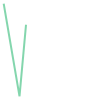

In [13]:
# Visualize 
line

In [14]:
# Print
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


As we can see from above, the `line` -variable constitutes of multiple coordinate-pairs.

Check also the data type:

In [15]:
# Check data type of the line object
type(line)

shapely.geometry.linestring.LineString

In [16]:
# Check geometry type of the line object
line.geom_type

'LineString'

### LineString attributes and functions


`LineString` -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from [Shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html). Here, we go through a few of them.

We can extract the coordinates of a LineString similarly as with `Point`

In [17]:
# Get x and y coordinates of the line
lxy = line.xy
print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


As we can see, the coordinates are again stored as a numpy arrays where first array includes all x-coordinates and the second one all the y-coordinates respectively.

We can extract only x or y coordinates by referring to those arrays using indices (same way you would access values in a list):

In [18]:
# Extract x coordinates
line_xcoords = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_ycoords = line.xy[1]

In [19]:
print('line_x:\n', line_xcoords, '\n')
print('line_y:\n', line_ycoords)

line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456])


It is possible to retrieve specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself:

In [20]:
# Get the lenght of the line
line.length

52.46106912939557

POINT (6.229961354035622 -11.89241115757239)


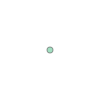

In [21]:
# Get the centroid of the line
print(line.centroid)
line.centroid

Nice! These are already fairly useful information for many different GIS tasks, and we didn’t even calculate anything yet! These attributes are built-in in every LineString object that is created.

Notice that the centroid that is returned is `Point` -object that has its own functions as was described earlier.

## Polygon


Creating a `Polygon` -object continues the same logic of how `Point` and `LineString` were created but Polygon object only accepts a sequence of coordinates as input. 

Polygon needs **at least three coordinate-tuples** (three points are reguired to form a surface). Let's use these coordinates: `(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)`

In [22]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

Let's see how our Polygon looks like

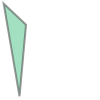

In [23]:
# Visualize 
poly

In [24]:
# Print
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Notice that `Polygon` representation has double parentheses around the coordinates (i.e. `POLYGON ((<values in here>))` ). This is because Polygon can also have holes inside of it. 

Check also the data type:

In [25]:
# Data type
type(poly)

shapely.geometry.polygon.Polygon

In [26]:
# Check the help for Polygon objects:
help(Polygon)

Help on class Polygon in module shapely.geometry.polygon:

class Polygon(shapely.geometry.base.BaseGeometry)
 |  Polygon(shell=None, holes=None)
 |  
 |  A two-dimensional figure bounded by a linear ring
 |  
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |  
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.
 |  
 |  Method resolution order:
 |      Polygon
 |      shapely.geometry.base.BaseGeometry
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, shell=None, holes=None)
 |      Parameters
 |      ----------
 |      shell : sequence
 |          A sequence of (x, y [,z]) numeric coo



As the help of [Polygon](https://shapely.readthedocs.io/en/stable/manual.html#polygons) -object tells, a Polygon can be constructed using exterior coordinates and interior coordinates (optional) where the interior coordinates creates a hole inside the Polygon:


```
Help on Polygon in module shapely.geometry.polygon object:
     class Polygon(shapely.geometry.base.BaseGeometry)
      |  A two-dimensional figure bounded by a linear ring
      |
      |  A polygon has a non-zero area. It may have one or more negative-space
      |  "holes" which are also bounded by linear rings. If any rings cross each
      |  other, the feature is invalid and operations on it may fail.
      |
      |  Attributes
      |  ----------
      |  exterior : LinearRing
      |      The ring which bounds the positive space of the polygon.
      |  interiors : sequence
      |      A sequence of rings which bound all existing holes.
      
```

Let's see how we can create a `Polygon` with a hole:

In [27]:
# First we define our exterior
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [28]:
# Let's create a single big hole where we leave ten units at the boundaries
# Note: there could be multiple holes, so we need to provide list of coordinates for the hole inside a list
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [29]:
# World without a hole
world = Polygon(border)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=border, holes=hole)


Let's see what we have now:

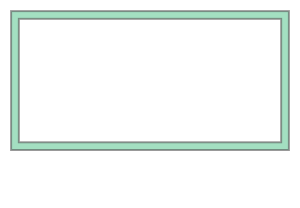

In [30]:
# Visualize world_has_a_hole
world_has_a_hole

As we can see the `Polygon` has now two different tuples of coordinates. The first one represents the **outerior** and the second one represents the **hole** inside of the Polygon.

### Polygon attributes and functions


We can again access different attributes directly from the `Polygon` object itself that can be really useful for many analyses, such as `area`, `centroid`, `box`, `exterior`, and `exterior.length`. See a full list of methods in the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manual).

Here, we can see a few of the available attributes and how to access them:

In [31]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

In [32]:
# Print the outputs
print("Polygon centroid: ", world_centroid)
print("Polygon Area: ", world_area)
print("Polygon Bounding Box: ", world_bbox)
print("Polygon Exterior: ", world_ext)
print("Polygon Exterior Length: ", world_ext_length)

Polygon centroid:  POINT (-0 -0)
Polygon Area:  64800.0
Polygon Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length:  1080.0


As we can see above, it is again fairly straightforward to access different attributes from the `Polygon` -object. Notice, that the extrerior lenght is given here with decimal degrees because we passed latitude and longitude coordinates into our Polygon.

## Geometry collections (optional)


In some occassions it is useful to store multiple geometries (for example, several points or several polygons) in a single feature. A practical example would be a country that is composed of several islands. In such case, all these polygons share the same attributes on the country-level and it might be reasonable to store that country as geometry collection that contains all the polygons. The attribute table would then contain one row of information with country-level attributes, and the geometry related to those attributes would represent several polygon. 

In Shapely, collections of points are implemented by using a MultiPoint -object, collections of curves by using a MultiLineString -object, and collections of surfaces by a MultiPolygon -object. 

In [33]:
# Import constructors for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

Let's start by creating MultiPoint and MultilineString objects:

In [34]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

In [35]:
# Print object definitions
print(multi_point)
print(multi_line)

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))


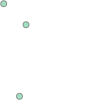

In [36]:
# Visualize multi_point
multi_point

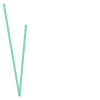

In [37]:
# Visualize multi_line
multi_line

MultiPolygons are constructed in a similar manner. Let's create a bounding box for "the world" by combinin two separate polygons that represent the western and eastern hemispheres. 

In [38]:
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(west_exterior, holes=west_hole)

# Print object definition
print(west_poly)

POLYGON ((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80))


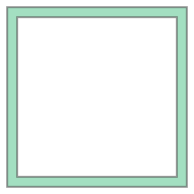

In [39]:
# Visualize polygon
west_poly

Shapely also has a tool for creating [a bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) based on minimum and maximum x and y coordinates. Instead of using the Polygon constructor, let's use the [box](https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.box) constructor for creating the polygon:  

In [40]:
from shapely.geometry import box

In [41]:
# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using Shapely
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Print object definition
print(east_poly_box)

POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))


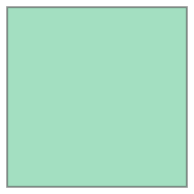

In [42]:
# Visualize the polygon
east_poly_box

Finally, we can combine the two polygons into a MultiPolygon:

In [43]:
# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print object definition
print(multi_poly)

MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


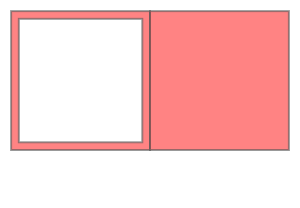

In [44]:
# Visualize multi polygon
multi_poly

We can see that the outputs are similar to the basic geometric objects that we created previously but now these objects contain multiple features of those points, lines or polygons.

### Convex hull and envelope

Convex hull refers to the smalles possible polygon that contains all objects in a collection. Alongside with the minimum bounding box, convex hull is a useful shape when aiming to describe the extent of your data.  

Let's create a convex hull around our multi_point object:

In [45]:
# Convex Hull (smallest polygon around the geometry collection)
convex = multi_point.convex_hull

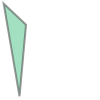

In [46]:
# Visualize
convex

In [47]:
# Envelope (smalles rectangular polygon around the geometry collection): 
envelope = multi_point.envelope

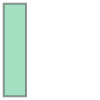

In [48]:
# Visualize
envelope

### Other useful attributes 
lenght of the geometry collection:

In [49]:
print("Number of objects in our MultiLine:", len(multi_line))
print("Number of objects in our MultiPolygon:", len(multi_poly))

Number of objects in our MultiLine: 2
Number of objects in our MultiPolygon: 2


Area:

In [50]:
# Print outputs:
print("Area of our MultiPolygon:", multi_poly.area)
print("Area of our Western Hemisphere polygon:", multi_poly[0].area)

Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0


From the above we can see that MultiPolygons have exactly the same attributes available as single geometric objects but now the information such as area calculates the area of **ALL** of the individual -objects combined. We can also access individual objects inside the geometry collections using indices.

Finally, we can check if we have a "valid" MultiPolygon. MultiPolygon is thought as valid if the individual polygons does notintersect with each other. 
Here, because the polygons have a common 0-meridian, we should NOT have a valid polygon. We can check the validity of an object from the **is_valid** -attribute that tells if the polygons or lines intersect with each other. This can be really useful information when trying to find topological errors from your data:

In [51]:
print("Is polygon valid?: ", multi_poly.is_valid)

Is polygon valid?:  False
